In [1]:
import pandas as pd
import sys
sys.path.append('../../py')
import db
import weighted
import inspect
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['Microsoft YaHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

import seaborn as sns
import scipy.stats as stats
import numpy as np
import math

In [2]:
from config import *

In [3]:
print(f"{year}-{month:02}")

2020-09


In [4]:
conn=db.get_conn()

In [5]:
data_original=pd.read_sql(sql=f"select * from jobs where year_month={year}{month:02} and monthly_salary>0 and monthly_salary<80000", con=conn)


In [6]:
data=data_original

In [7]:
int(data_original['monthly_salary'].mean())

14475

In [16]:
month=['201906', '201907', '201908', '201909', '201910', '201911', '201912', 
      '202001', '202002', '202003', '202004', '202005', '202006', '202007', '202008', '202009']

In [17]:
salary=[13387, 13600, 13785, 13817, 13730, 13857, 13938, 14085, 14525, 14653, 14481, 14542, 14404, 14357, 14392]

ValueError: x and y must have same first dimension, but have shapes (16,) and (15,)

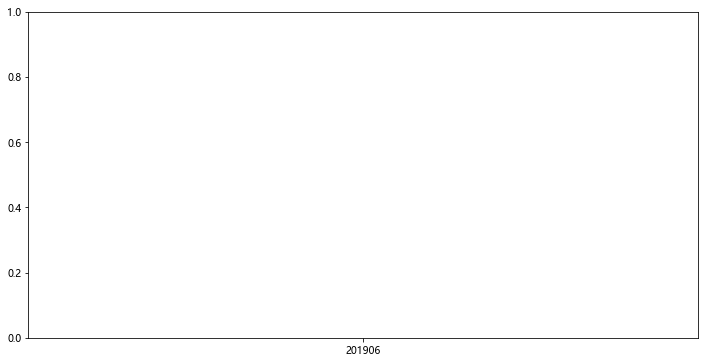

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(month, salary)
plt.title("大陆地区程序员工资变化")
plt.show()

In [11]:
df_career=data.groupby('career').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean'),
    #median=pd.NamedAgg(column='monthly_salary', aggfunc='median'),
)

In [12]:
df_career['salary']=df_career['salary'].astype(int)
#df_career['median']=df_career['median'].astype(int)

In [13]:
df_career

,salary
career,
ADAS,17844
Android开发工程师,14335
BI工程师,13604
CAE,15055
CTO,28859
...,...
视觉软件工程师,14635
语音识别工程师,14139
软件工程师,13677


In [14]:
data_all=pd.read_sql(sql=f"select * from jobs where monthly_salary>0 and monthly_salary<80000", con=conn)


In [15]:
data.groupby('yearmonth').agg(
    salary=pd.NamedAgg(column='monthly_salary', aggfunc='mean'),
    headcount=pd.NamedAgg(column='headcount', aggfunc='sum'),
)

KeyError: 'yearmonth'